In [1]:
#!/usr/bin/env python
import os
import pandas as pd
import matplotlib as plt
from collections import defaultdict
# open all csv of schduler and get total average turnaround time of each scheduler, plot a chart, compare which one perform good

# Experiment 1

In [2]:
schedulers = ["FCFS","ISJF", "SJF", "RR"]
num_of_test_case = int(os.environ.get("TEST_CASES"))
total_average_TAT = defaultdict(list)
total_average_WT = defaultdict(list)
total_CPU_utilization = defaultdict(list)

for scheduler in schedulers:
    for i in range(1, num_of_test_case):
        file_path = f"experiment1/scheduler/{scheduler}/output/output{i}.out"
        df = pd.read_csv(file_path, sep="\t", header=0)
        average_TAT = round(df["turnaroundTime"].mean())
        average_WT = round(df["waitingTime"].mean())
        total_average_TAT[scheduler].append(average_TAT)
        total_average_WT[scheduler].append(average_WT)
        total_CPU_utilization[scheduler].append(df[df["id"] == 0]["cpuTime"].values[0])


<AxesSubplot:>

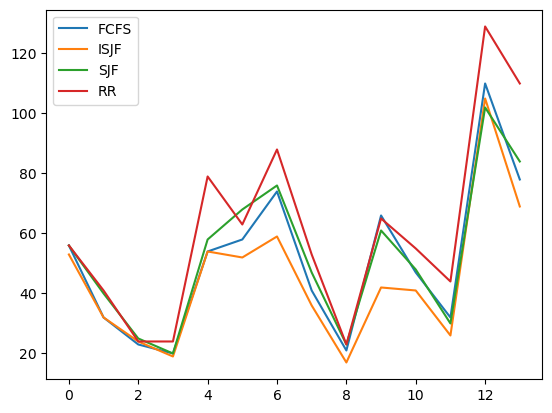

In [3]:
df = pd.DataFrame.from_dict(total_average_TAT)
df.plot()

<AxesSubplot:>

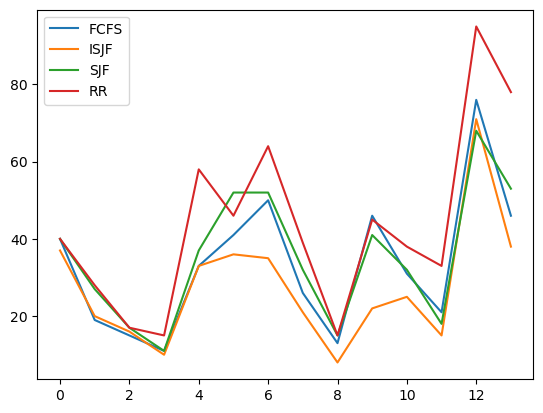

In [4]:
df = pd.DataFrame.from_dict(total_average_WT)
df.plot()

In [5]:
print(total_CPU_utilization)

defaultdict(<class 'list'>, {'FCFS': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], 'ISJF': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], 'SJF': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], 'RR': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]})


<AxesSubplot:>

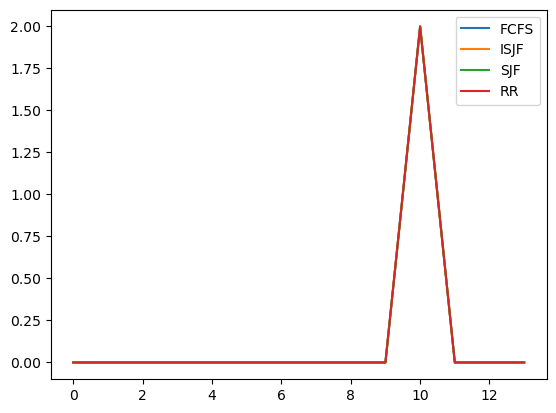

In [6]:
df = pd.DataFrame.from_dict(total_CPU_utilization)
df.plot()

In [7]:
schedulers = ["FCFS","ISJF", "SJF", "RR"]
num_of_test_case = int(os.environ.get("TEST_CASES"))
total_average_TAT = defaultdict(list)
total_average_WT = defaultdict(list)
total_CPU_utilization = defaultdict(list)

for scheduler in schedulers:
    for i in range((num_of_test_case + 1), (num_of_test_case * 2 + 1)):
        file_path = f"experiment1/scheduler/{scheduler}/output/output{i}.out"
        df = pd.read_csv(file_path, sep="\t", header=0)
        average_TAT = round(df["turnaroundTime"].mean())
        average_WT = round(df["waitingTime"].mean())
        total_average_TAT[scheduler].append(average_TAT)
        total_average_WT[scheduler].append(average_WT)
        total_CPU_utilization[scheduler].append(df[df["id"] == 0]["cpuTime"].values[0])


<AxesSubplot:>

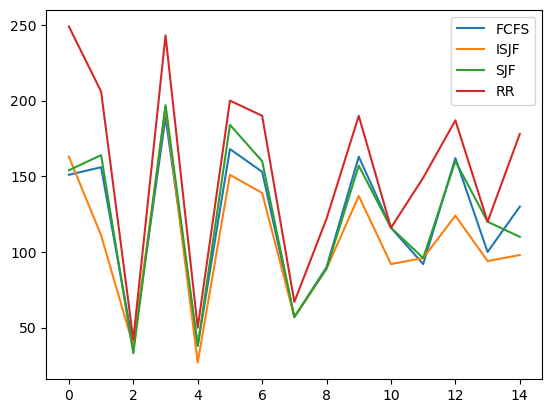

In [8]:
df = pd.DataFrame.from_dict(total_average_TAT)
df.plot()

<AxesSubplot:>

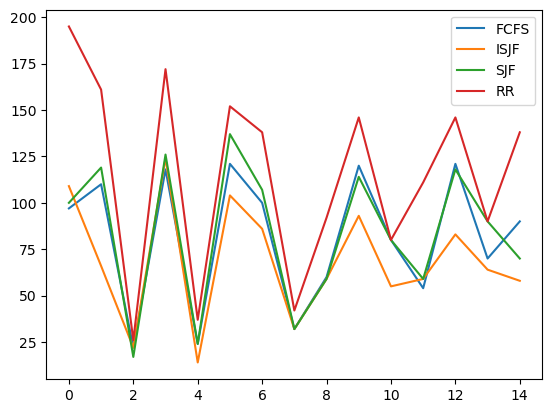

In [9]:
df = pd.DataFrame.from_dict(total_average_WT)
df.plot()

# Experiment 2

In [10]:
schedulers = ["FCFS","ISJF", "SJF", "RR"]
num_of_test_case = int(os.environ.get("TEST_CASES"))
total_average_TAT = defaultdict(list)
total_average_WT = defaultdict(list)
total_CPU_utilization = defaultdict(list)

for scheduler in schedulers:
    for i in range(1, num_of_test_case):
        file_path = f"experiment2/scheduler/{scheduler}/output/output{i}.out"
        df = pd.read_csv(file_path, sep="\t", header=0)
        average_TAT = round(df["turnaroundTime"].mean())
        average_WT = round(df["waitingTime"].mean())
        total_average_TAT[scheduler].append(average_TAT)
        total_average_WT[scheduler].append(average_WT)
        total_CPU_utilization[scheduler].append(df[df["id"] == 0]["cpuTime"].values[0])

<AxesSubplot:>

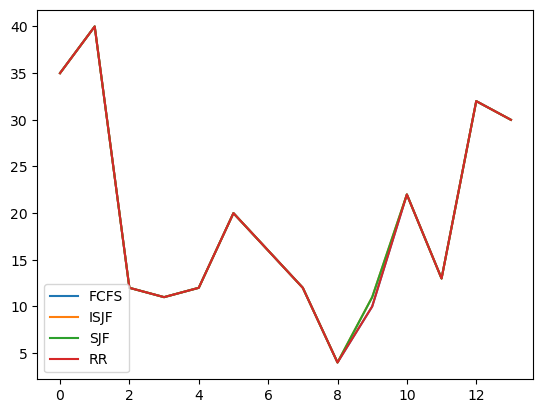

In [11]:
df = pd.DataFrame.from_dict(total_average_TAT)
df.plot()

<AxesSubplot:>

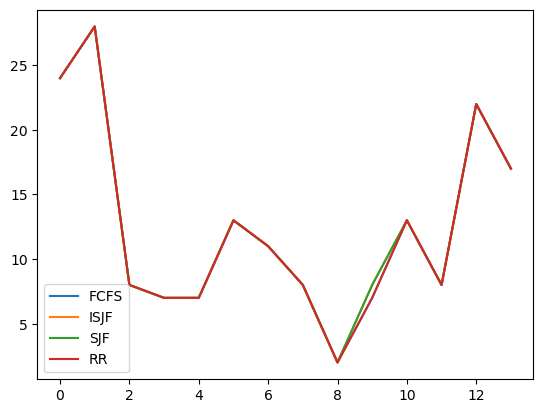

In [12]:
df = pd.DataFrame.from_dict(total_average_WT)
df.plot()

In [13]:
schedulers = ["FCFS","ISJF", "SJF", "RR"]
num_of_test_case = int(os.environ.get("TEST_CASES"))
total_average_TAT = defaultdict(list)
total_average_WT = defaultdict(list)
total_CPU_utilization = defaultdict(list)

for scheduler in schedulers:
    for i in range((num_of_test_case + 1), (num_of_test_case * 2 + 1)):
        file_path = f"experiment2/scheduler/{scheduler}/output/output{i}.out"
        df = pd.read_csv(file_path, sep="\t", header=0)
        average_TAT = round(df["turnaroundTime"].mean())
        average_WT = round(df["waitingTime"].mean())
        total_average_TAT[scheduler].append(average_TAT)
        total_average_WT[scheduler].append(average_WT)
        total_CPU_utilization[scheduler].append(df[df["id"] == 0]["cpuTime"].values[0])


<AxesSubplot:>

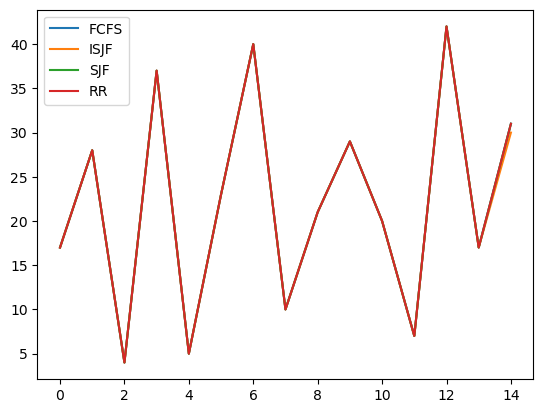

In [14]:
df = pd.DataFrame.from_dict(total_average_TAT)
df.plot()

<AxesSubplot:>

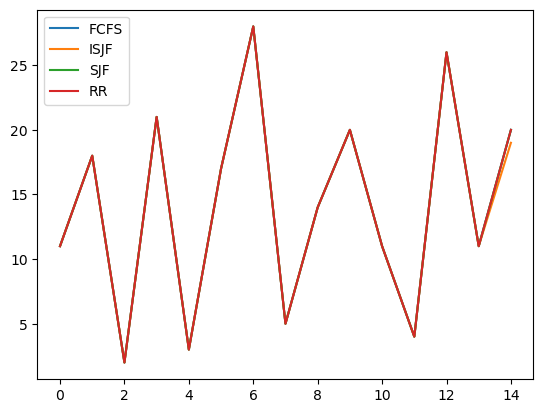

In [15]:
df = pd.DataFrame.from_dict(total_average_WT)
df.plot()